# Assignment A2a: Signal Detection
Hunter Welch 2/6/2023

## 1. Generating signals with events and additive noise

### 1a. Randomly occurring events in Gaussian noise

Write a function `genwaveform(N=100, α=0.1, A=1, σ=1)` to generate a waveform that is a linear combination of a sparsely occurring events and additive Gaussian noise.

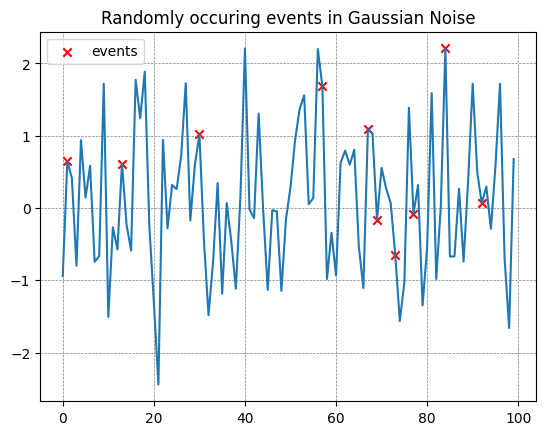

In [8]:
from noisy_gaussian import plot_genwaveform

plot_genwaveform()

### 1b. Signals in uniform noise

Modify the `genwaveform` function so that it accepts an argument `noisetype` to specify the type of noise.  Here we will use `Gaussian` and `uniform`.

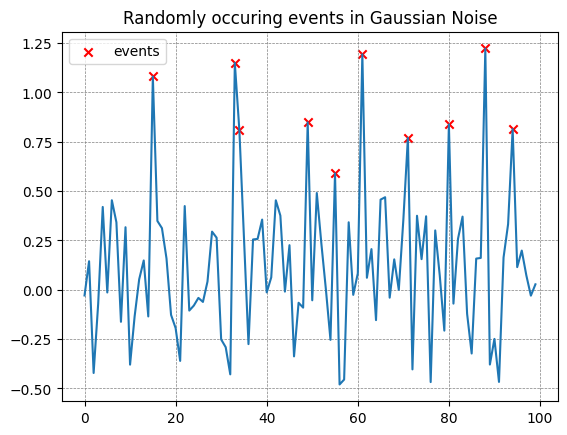

In [7]:
from noisy_gaussian import plot_genwaveform

plot_genwaveform(noisetype="uniform")

### 1c. Notation

To write an equation to express the signal $x[t]$ as a sum of $N$ events of amplitude $A$ that occur at times $\tau_i$, it is important to use the discrete delta-function to denote when time $\tau$ is an event. The function of $x[t]$ would look like:

$$
  x[t] = \sum_{i=1}^{N} A * \delta[t-\tau]
$$

The equation to denote the noise distributed according to a Normal is:

$$
    \epsilon[t] = p(\mu, \sigma^2)
$$


### 1d. Conditional probability

The expression for the probability distribution of the waveform at time $t$ given that there is a signal is the sum of the signal and the noise:

$$
y[t] = x[t] + \epsilon[t]
$$

So replacing with the calculated values,

$$
y[t] = \sum_{i=1}^{N} A * \delta[t-\tau] + p(\mu, \sigma^2)
$$

## 2. Signal detection

### 2a. Effect of parameters on detection probability

Explain what effect the parameters and type of noise have on detection probability.  For what values does the probability reduce to pure chance?  Or become certain (i.e. approach 1)?  Explain your reasoning and illustrate with plots.

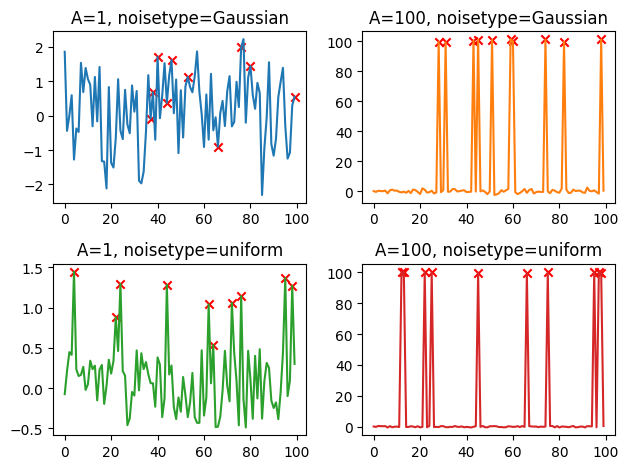

In [2]:
from noisy_gaussian import plot_comparison

plot_comparison()

It is clear by the graphs that the noisetype does not play that big of a factor on detection probability, but uniform is slightly more clear.

The larger impact is having a higher amplitude makes it extremely clear in distinguishing events from noise. Having a higher A value will result in a higher SNR.

### 2b. Types of detections and detection errors

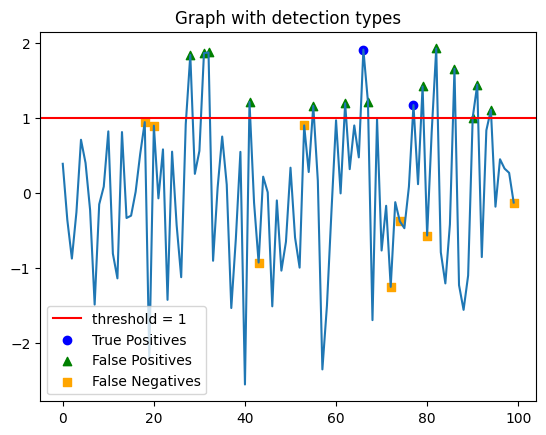

In [2]:
from noisy_gaussian import plot_detection_types, detectioncounts, genwaveform

waveform, event_indices = genwaveform()

detectioncounts(event_indices, waveform, 1)

plot_detection_types(event_indices, waveform, 1)

### 2c. Detection probabilities

The probability of a false positive in terms of our parameters is the probability that a point is not on the signal indices array and over the threshold, given that it is not on the signal indices array.
By utilizing the rules of probability we can rewrite this equation as

$$
FPR = \frac{fp}{fp + tn}
$$

Using the same logic we can find the rate of false negatives, knowing that the opposite logic holds true. The probability is that a point is under the threshold and on the signal indices array, given that it is on the signal indices array.

$$
FNR = \frac{fn}{fn + tp}
$$

In [49]:
from noisy_gaussian import falsepos, falseneg

print("The false positive rate is: ", round(falsepos(theta=1), 2) * 100, "% when theta=1 default parameters for graph")

print("The false negative rate is: ", round(falseneg(theta=1), 2) * 100, "% when theta=1 default parameters for graph")

The false positive rate is:  16.0 % when theta=1 default parameters for graph
The false negative rate is:  40.0 % when theta=1 default parameters for graph


## 3. ROC cures

### 3a. Threshold considerations

There is not an optimal value for the threshold because it is just a separator to determine if something is being classified as one thing or another. By shifting the threshold in either direction, there will always incur a tradeoff. If you optimize for a minimum number of false positives, you will have a lot more false negatives. By using non-linear thresholds you can get even more exact but at the price of potentially overtuning the data.

The value that minimizes the total error probability would be where there is the lowest sum of false positives and false negatives errors. This is different from minimizing the toal number of errors, since it is specific to the dataset it is dealing with, rather than the entire problem

### 3b. ROC plot

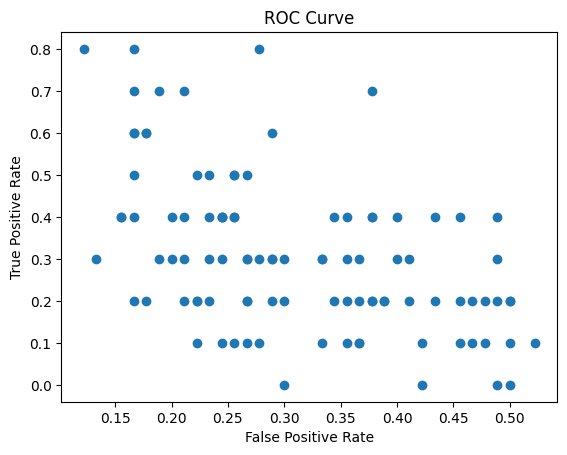

In [2]:
from noisy_gaussian import plotROC

plotROC()